In [113]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.filters import threshold_otsu
from skimage.measure import label
from uncertainties import ufloat
import uncertainties as ct
from uncertainties import unumpy as unp
from scipy.optimize import curve_fit
import importlib
import sys

sys.path.append('C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil\\notebooks')

import amglib.imageutils as amg
import amglib.readers as rd
import amglib.bb as bblib

import os

os.chdir('C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil')

In [114]:
ob = rd.readImages('data/02_rawdata/01_Stepwedges/ob_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)
dc = rd.readImages('data/02_rawdata/01_Stepwedges/dc_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)
es = rd.readImages('data/02_rawdata/01_Stepwedges/container_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0) 
bb = rd.readImages('data/02_rawdata/01_Stepwedges/bb_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)
bbes = rd.readImages('data/02_rawdata/01_Stepwedges/water_bb_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)
water = rd.readImages('data/02_rawdata/01_Stepwedges/water_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [115]:
maskbb,rbb,cbb = bblib.get_black_bodies(bb, greythres=15000, areas=[0, 1000] , R=5)
maskbbes,rbbes,cbbes = bblib.get_black_bodies(bbes, greythres=12500, areas=[0, 1000], R=5)
maskbb[1000:, :] = 0
maskbbes[150:230, :] = 0
img_corr_bb = bblib.compute_scatter_image(bb,rbb,cbb)
img_corr_bbes = bblib.compute_scatter_image(bbes, rbbes, cbbes)

### Normalize (Beer Lambert) - with caveats

$$p=-log(\frac{I-I_{dc}}{I_{ob}-I_{dc}})$$ 

In [116]:
ob_new = ob - dc - img_corr_bb
ob_new[ob_new<1]=1
ob_new = ob_new[::-1]

water_new = water - dc - img_corr_bbes
water_new[water_new<1]=1
water_new = water_new[::-1]

d0=ob_new[0:600,:].mean()
d=water_new[0:600,:].mean()

p = -np.log(d0/d*(water_new)/(ob_new))

In [117]:
d0, d, d0/d

(16363.254992591837, 19380.505077991053, 0.8443151985328972)

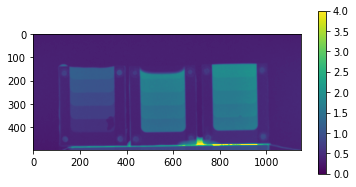

In [118]:
plt.imshow(p[500:1000,0:1150], vmin=0, vmax=4)
plt.colorbar(shrink=0.75);

In [107]:
p1=p[:,200:250].mean(axis=1)

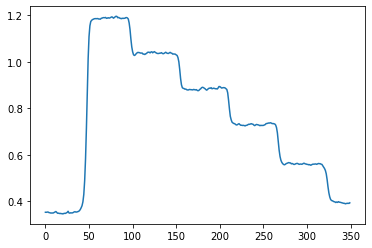

In [108]:
plt.plot(p1[600:950])

In [109]:
dp1 = p1[:-1]-p1[1:]
mask = dp1<0.005
l=label(mask)
p10=p1[1:]
np.mean(p10[l==0]) 

3.0660928848854403

## starting here 

In [120]:
p=p[500:1000,0:1150]

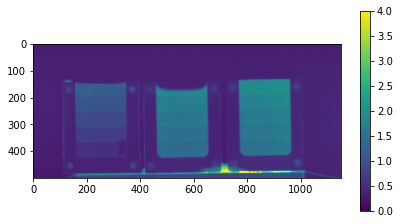

In [122]:
plt.imshow(p, vmin=0, vmax=4)
plt.tight_layout()
plt.colorbar(shrink=0.75);
# plt.savefig("bb_corrected_samples.png", dpi=500)

In [28]:
step_wedge_1 = p[:, 200:250]
stw1_average = step_wedge_1.mean(axis=1)

step_wedge_2 = p[:, 500:550]
stw2_average = step_wedge_2.mean(axis=1)

step_wedge_3 = p[:, 800:850]
stw3_average = step_wedge_3.mean(axis=1)

d1 = (stw1_average[:-1] - stw1_average[1:])
d2 = (stw2_average[:-1] - stw2_average[1:])
d3 = (stw3_average[:-1] - stw3_average[1:])

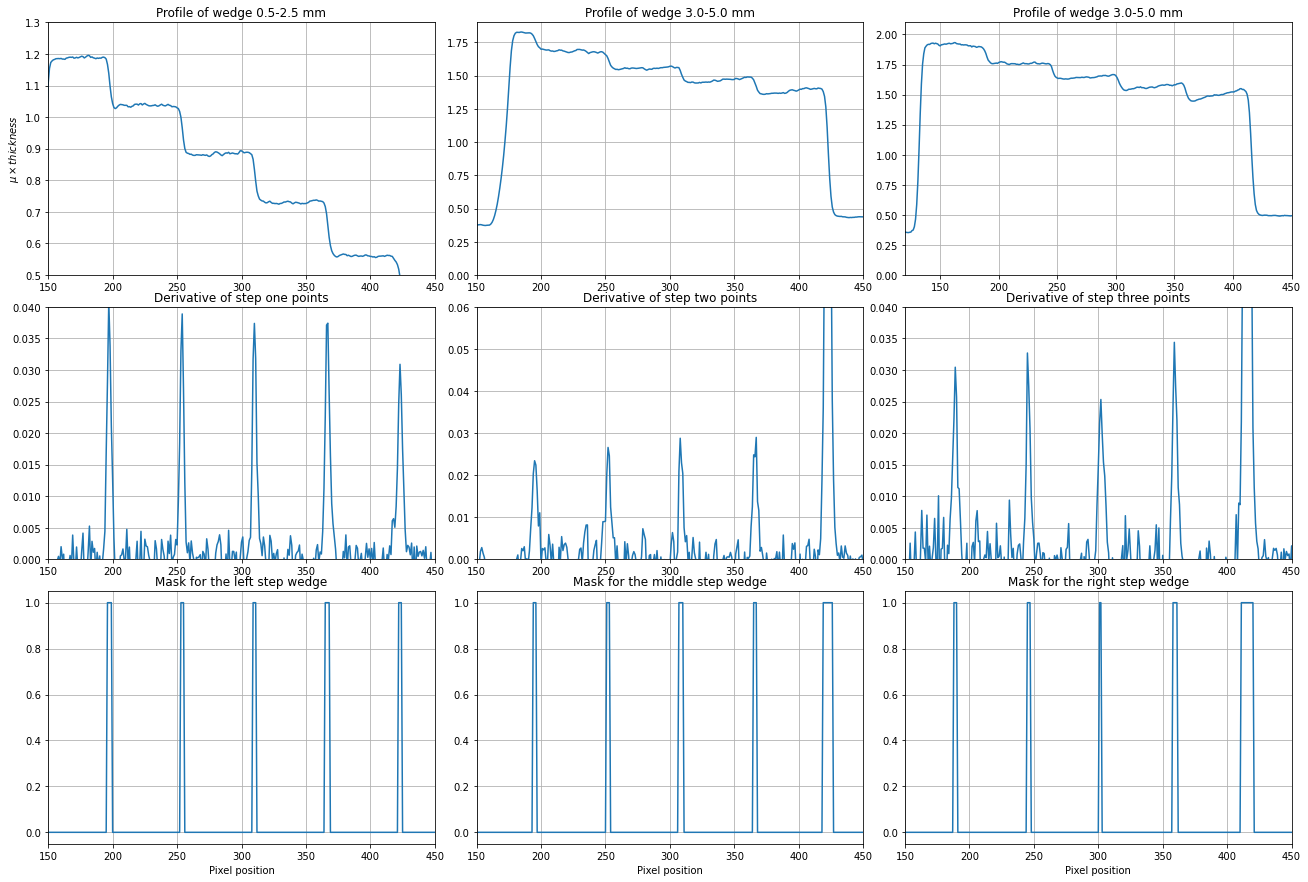

In [139]:
fig, ax = plt.subplots(3, 3)
# fig.set_size_inches(18, 10)
fig.set_size_inches(18, 12)
fig.tight_layout()
# fig.set_dpi(800)
ax = ax.ravel()

ax[0].plot(step_wedge_1.mean(axis=1))
ax[0].set_title('Profile of wedge 0.5-2.5 mm')
ax[0].set_xlim(150, 450)
ax[0].set_ylim(0.5, 1.3)
ax[0].set_ylabel(r'$\mu\times thickness$')
ax[0].grid()

ax[1].plot(step_wedge_2.mean(axis=1))
ax[1].set_title('Profile of wedge 3.0-5.0 mm')
ax[1].set_xlim(150, 450)
ax[1].set_ylim(0, 1.9)
ax[1].grid()

ax[2].plot(step_wedge_3.mean(axis=1))
ax[2].set_title('Profile of wedge 3.0-5.0 mm')
ax[2].set_xlim(120, 450)
ax[2].set_ylim(0, 2.1)
ax[2].grid()

ax[3].plot(d1)
ax[3].set_xlim(150, 450)
ax[3].set_title("Derivative of step one points")
ax[3].set_ylim(0, 0.04)
ax[3].grid()

ax[4].plot(d2)
ax[4].set_xlim(150, 450)
ax[4].set_title("Derivative of step two points")
ax[4].set_ylim(0, 0.06)
ax[4].grid()

ax[5].plot(d3)
ax[5].set_xlim(150, 450)
ax[5].set_title("Derivative of step three points")
ax[5].set_ylim(0, 0.040)
ax[5].grid()

mask1 = d1>0.02
mask2 = d2>0.02
mask3 = d3>0.02

ax[6].plot(abs(d1)<mask1)
ax[6].set_xlim(150, 450)
ax[6].set_xlabel('Pixel position')
ax[6].set_title("Mask for the left step wedge")
ax[6].grid()


ax[7].plot(abs(d2)<mask2)
ax[7].set_xlim(150, 450)
ax[7].set_xlabel('Pixel position')
ax[7].set_title("Mask for the middle step wedge")
ax[7].grid()

ax[8].plot(abs(d3)<mask3)
ax[8].set_xlim(150, 450)
ax[8].set_xlabel('Pixel position')
ax[8].set_title("Mask for the right step wedge")
ax[8].grid()

plt.savefig("analysis_bb.png",dpi=800)

In [40]:
l1 = label(mask1)
l2 = label(mask2)
l3 = label(mask3)

s_stw1 = step_wedge_1.mean(axis=1)[1:]
masked_1 = s_stw1[l1 == 0]

s_stw2 = step_wedge_2.mean(axis=1)[1:]
masked_2 = s_stw2[l2 == 0]

s_stw3 = step_wedge_3.mean(axis=1)[1:]
masked_3 = s_stw3[l3 == 0]

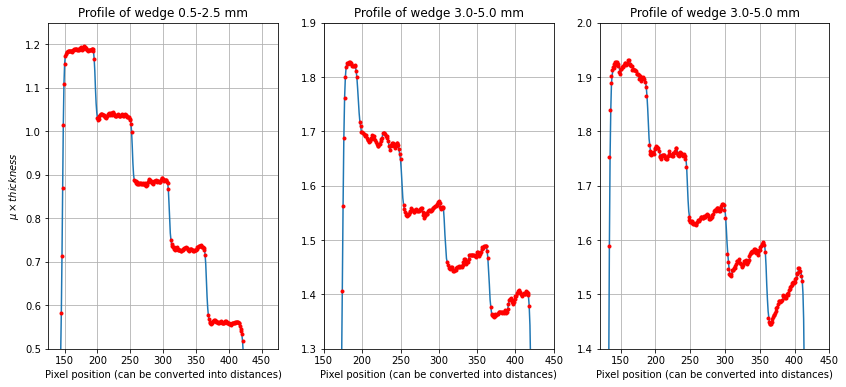

In [54]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(14, 6)
# fig.set_size_inches(10, 5)
# fig.set_dpi(800)
ax = ax.ravel()

ax[0].plot(s_stw1)
ax[0].set_title('Profile of wedge 0.5-2.5 mm')
ax[0].set_xlabel('Pixel position (can be converted into distances)')
ax[0].plot(np.where(l1 == 0)[0], masked_1, 'r.')
ax[0].set_xlim(125, 475)
ax[0].set_ylim(0.5, 1.25)
ax[0].set_ylabel(r'$\mu\times thickness$')
ax[0].grid()

ax[1].plot(s_stw2)
ax[1].set_title('Profile of wedge 3.0-5.0 mm')
ax[1].set_xlabel('Pixel position (can be converted into distances)')
ax[1].plot(np.where(l2 == 0)[0], masked_2, 'r.')
ax[1].set_xlim(150, 450)
ax[1].set_ylim(1.3, 1.9)
ax[1].grid()

ax[2].plot(step_wedge_3.mean(axis=1))
ax[2].set_title('Profile of wedge 3.0-5.0 mm')
ax[2].set_xlabel('Pixel position (can be converted into distances)')
ax[2].plot(np.where(l3 == 0)[0], masked_3, 'r.')
ax[2].set_xlim(120, 450)
ax[2].set_ylim(1.4,2)
ax[2].grid()

# for i in range(3):
#     a, b = fitting_params2[i, :]
#     print(a, b)
#     model = lambda x: a * x + b
#     new_linsp = np.linspace(650, 950, 400)
#     ax[i].plot(new_linsp, model(new_linsp), color="green")
# fig.savefig("processed_data/finding_all_flat_points.png", dpi=800)

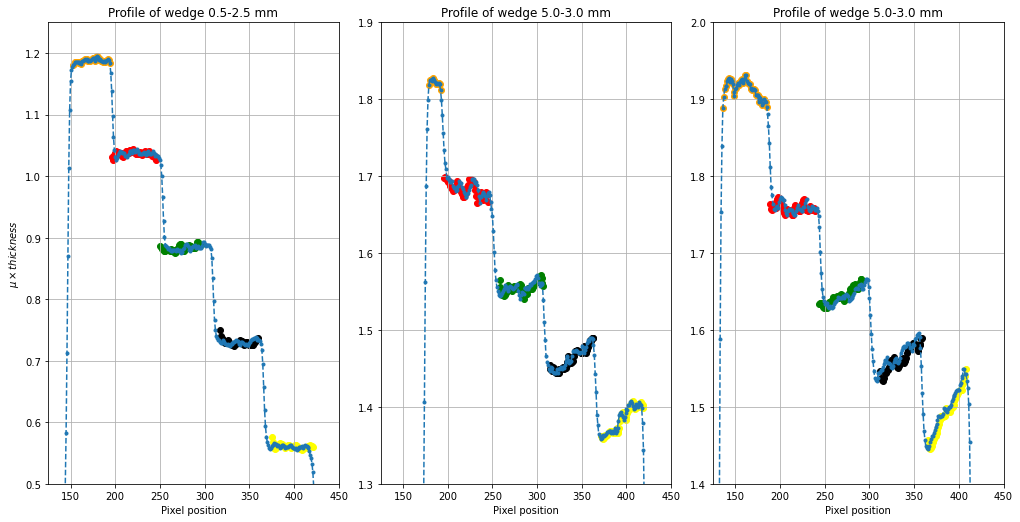

In [85]:
# when normalizing with the es
points_of_interest1_25 = range(153,195) # orange
points_of_interest1_20 = range(196, 247)# red
points_of_interest1_15 = range(250, 297)# green
points_of_interest1_10 = range(302, 346)# black
points_of_interest1_5 = range(355, 402) # yellow

points_of_interest2_50 = range(179, 193)
points_of_interest2_45 = range(196, 246)
points_of_interest2_40 = range(248, 298)
points_of_interest2_35 = range(302, 352)
points_of_interest2_30 = range(357, 405)


points_of_interest3_50 = range(136, 186)
points_of_interest3_45 = range(189, 240)
points_of_interest3_40 = range(244, 292)
points_of_interest3_35 = range(297, 345)
points_of_interest3_30 = range(350, 394)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(14, 7)
fig.tight_layout()
# fig.set_size_inches(10, 5)
# fig.set_dpi(800)
ax = ax.ravel()

ax[0].plot(s_stw1, '.--')
ax[0].set_title('Profile of wedge 0.5-2.5 mm')
ax[0].set_xlabel('Pixel position')
ax[0].scatter(points_of_interest1_25, masked_1[points_of_interest1_25], color = "orange")
ax[0].scatter(points_of_interest1_20, masked_1[points_of_interest1_20], color = "red")
ax[0].scatter(points_of_interest1_15, masked_1[points_of_interest1_15], color = "green")
ax[0].scatter(np.array(points_of_interest1_10) + 15, masked_1[points_of_interest1_10], color = "black")
ax[0].scatter(np.array(points_of_interest1_5) + 20, masked_1[points_of_interest1_5], color = "yellow")
ax[0].set_xlim(125, 450)
ax[0].set_ylim(0.5, 1.25)
ax[0].set_ylabel(r'$\mu\times thickness$')
ax[0].grid()

ax[1].plot(s_stw2, '.--')
ax[1].set_title('Profile of wedge 5.0-3.0 mm')
ax[1].set_xlabel('Pixel position')
ax[1].scatter(np.array(points_of_interest2_50), masked_2[points_of_interest2_50], color = "orange")
ax[1].scatter(np.array(points_of_interest2_45), masked_2[points_of_interest2_45], color = "red")
ax[1].scatter(np.array(points_of_interest2_40) + 10, masked_2[points_of_interest2_40], color = "green")
ax[1].scatter(np.array(points_of_interest2_35) + 12, masked_2[points_of_interest2_35], color = "black")
ax[1].scatter(np.array(points_of_interest2_30) + 15, masked_2[points_of_interest2_30], color = "yellow")
ax[1].set_xlim(125, 450)
ax[1].set_ylim(1.3, 1.9)
# ax[1].set_ylabel(r'$\mu\times thickness$')
ax[1].grid()


ax[2].plot(s_stw3, '.--')
ax[2].set_title('Profile of wedge 5.0-3.0 mm')
ax[2].set_xlabel('Pixel position')
ax[2].scatter(np.array(points_of_interest3_50), masked_3[points_of_interest3_50], color = "orange")
ax[2].scatter(np.array(points_of_interest3_45), masked_3[points_of_interest3_45], color = "red")
ax[2].scatter(np.array(points_of_interest3_40), masked_3[points_of_interest3_40], color = "green")
ax[2].scatter(np.array(points_of_interest3_35)+15, masked_3[points_of_interest3_35], color = "black")
ax[2].scatter(np.array(points_of_interest3_30)+15, masked_3[points_of_interest3_30], color = "yellow")
ax[2].set_xlim(125, 450)
ax[2].set_ylim(1.4,2)
ax[2].grid()

# fig.savefig("processed_data/explicit_points_es.png", dpi=800)

###### Normierung

In [86]:
px_per_cm = 112.78 # px / cm
cm_per_pix = px_per_cm**-1 

### STW1 

In [88]:
optical_depths1 = np.array([masked_1[i].mean() for i in (points_of_interest1_25, points_of_interest1_20, 
                                             points_of_interest1_15, points_of_interest1_10, 
                                             points_of_interest1_5) ]) # unitless
errors1 = np.array([masked_1[i].std(ddof=1) for i in (points_of_interest1_25, points_of_interest1_20, 
                                             points_of_interest1_15, points_of_interest1_10, 
                                             points_of_interest1_5) ]) # unitless

actual_depths1 = np.array([0.25, 0.2, 0.15, 0.1, 0.05]) # cm

In [89]:
linear = lambda x, a, b: a*x + b
pc1, pcov1 = curve_fit(linear, actual_depths1, optical_depths1, sigma = errors1)
fit_err1 = np.sqrt(np.diag(pcov1))
newlin1 = lambda x: pc1[0] *x + pc1[1]

### STW2 

In [90]:
optical_depths2 = np.array([masked_2[i].mean() for i in (points_of_interest2_50, points_of_interest2_45, 
                                             points_of_interest2_40, points_of_interest2_35, 
                                             points_of_interest2_30) ]) # unitless

errors2 = np.array([masked_2[i].std(ddof=1) for i in (points_of_interest2_50, points_of_interest2_45, 
                                             points_of_interest2_40, points_of_interest2_35, 
                                             points_of_interest2_30) ]) # unitless


actual_depths2 = np.array([0.5, 0.45, 0.40, 0.35, 0.3])

In [91]:
linear = lambda x, a, b: a*x + b
pc2, pcov2 = curve_fit(linear, actual_depths2, optical_depths2)
fit_err2 = np.sqrt(np.diag(pcov2))
newlin2 = lambda x: pc2[0] *x + pc2[1]

### STW3 

In [92]:
optical_depths3 = np.array([masked_3[i].mean() for i in (points_of_interest3_50, points_of_interest3_45, 
                                             points_of_interest3_40, points_of_interest3_35, 
                                             points_of_interest3_30) ]) # unitless
errors3 = np.array([masked_3[i].std(ddof=1) for i in (points_of_interest3_50, points_of_interest3_45, 
                                             points_of_interest3_40, points_of_interest3_35, 
                                             points_of_interest3_30) ]) # unitless

actual_depths3 = np.array([0.5, 0.45, 0.40, 0.35, 0.3])

In [93]:
linear = lambda x, a, b: a*x + b
pc3, pcov3 = curve_fit(linear, actual_depths3, optical_depths3, sigma=errors3)
fit_err3 = np.sqrt(np.diag(pcov3))
newlin3 = lambda x: pc3[0] *x + pc3[1]

### All together now! 

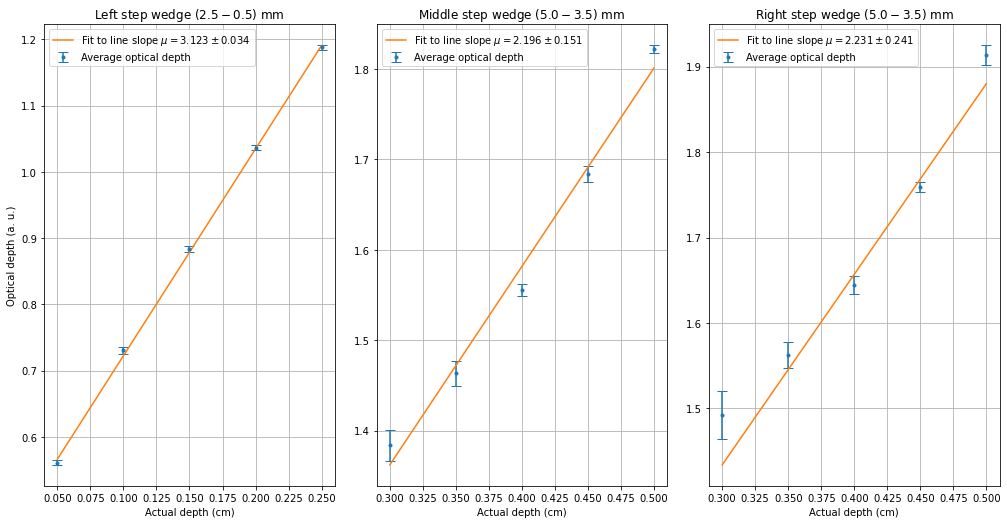

In [98]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(14, 7)
fig.tight_layout()

ax[0].errorbar(actual_depths1, optical_depths1, errors1, capsize=5, marker='.', linestyle='', label="Average optical depth")
ax[0].plot(actual_depths1, newlin1(actual_depths1), label=f"Fit to line slope $\mu = {round(pc1[0], 3)} \pm {round(fit_err1[0], 3)}$")
# ax[0].set_ylim(0.00,0.45)
ax[0].set_title("Left step wedge ($2.5-0.5$) mm")
ax[0].set_ylabel("Optical depth (a. u.)")

ax[1].errorbar(actual_depths2, optical_depths2, errors2, marker='.', linestyle='', capsize=5, label="Average optical depth")
ax[1].plot(actual_depths2, newlin2(actual_depths2), label=f"Fit to line slope $\mu = {round(pc2[0], 3)} \pm {round(fit_err2[0], 3)}$")
ax[1].set_title("Middle step wedge ($5.0-3.5$) mm")
# ax[1].set_ylim(0.25,0.7)


ax[2].errorbar(actual_depths3, optical_depths3, errors3, marker='.', linestyle='', capsize=5, label="Average optical depth")
ax[2].plot(actual_depths3, newlin3(actual_depths3), label=f"Fit to line slope $\mu = {round(pc3[0], 3)} \pm {round(fit_err3[0], 3)}$")
ax[2].set_title("Right step wedge ($5.0-3.5$) mm")
# ax[2].set_ylim(0.4,0.7)


for axis in ax:
    axis.grid()
    axis.set_xlabel("Actual depth (cm)")
    axis.legend(loc="upper left")

fig.savefig("processed_data/attenuation_coeffs_es_norm_bb_corrected.png", dpi=800)

In [99]:
pwd()

'C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil'